## Forecasting of quantity of ships moored in the port of Santos - BR

A problem that sometimes happens at the port of Santos, but which causes great damage at the port of Santos is the lines to disembark at the port. Therefore, we decided to forecast the number of ships anchored per day to understand the demand for the facilities. The data was extracted from PySpark3 notebook.

### Joining all files in a single dataframe

In [3]:
import pandas as pd

colunas=['mmsi', 'data']

#arq='0 0 1000 100 10'

inicioarq= 's3://optix.ons.jupyter/jupyter/dwater/folder/deb1/part-'
fimarq='-a5b67905-cecf-4bbc-bb91-61aef89492ce-c000.csv'

df1=pd.DataFrame()

for i in range(0,200):
    name=''
    if i<10:
        name=(inicioarq+'0000'+str(i)+fimarq) 
    elif i<100:
        name=(inicioarq+'000'+str(i)+fimarq)
    else:
        name=(inicioarq+'00'+str(i)+fimarq)
    df2=pd.read_csv(name, names=colunas)
    df1=pd.concat([df1, df2])
print(df1.head())

        mmsi        data
0  259756000  2020-01-01
1  355305000  2020-01-01
2  220209000  2020-01-01
3  636015404  2020-01-01
4  244820283  2020-01-01


### Counting the number of ships moored per day in the port of Santos

In [4]:
dias=df1['data'].unique()
lista=[]

for i in dias:
    count=0
    for j in df1.values:
        if j[1]==i:
            count+=1
    lista.append([count, i])

df_treino=pd.DataFrame(lista, columns=['y', 'ds'])

### Observations:
As the Python libraries we needed do not work in this environment, we decided to continue coding the forecasting in Google Colab. Anyway, follow the code used to finish the analysis and the result of it.

In [ ]:
import numpy as np
from fbprophet import Prophet

In [ ]:
# Model parametrization
forecasting_model = Prophet(interval_width=0.95)

# Model training
forecasting_model.fit(df_treino)

In [ ]:
# Testing the model
jh_forecast = forecasting_model.make_future_dataframe(periods=36, freq='MS')
jh_forecast = forecasting_model.predict(jh_forecast)

In [ ]:
# Result visualization

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
forecasting_model.plot(jh_forecast, xlabel = 'Date', ylabel = 'PTS')
plt.title('Forecasting of number os vessel per day')

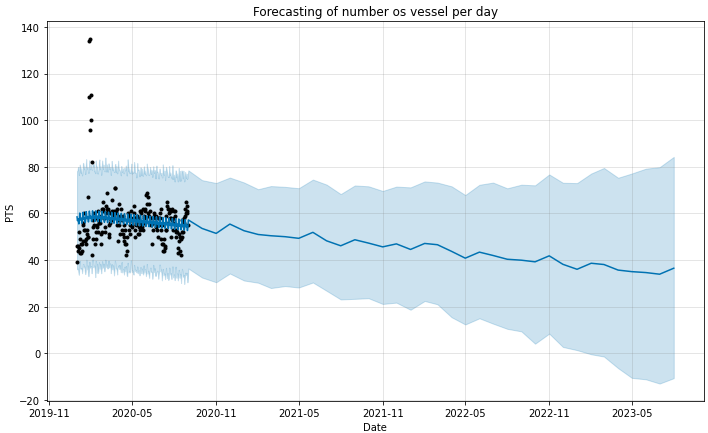